In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import unicodedata
import sys
import numpy as np
import itertools

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

%matplotlib inline

In [3]:
real = pd.read_csv('True.csv')  # import dataset
real['result'] = 'true'  # add column result that assigns true to each line
real.head() # view first 5 rows

,title,text,subject,date,result
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true


In [4]:
fake = pd.read_csv('Fake.csv')  # import dataset
fake['result'] = 'false'  # add column result that assigns false to each line
fake.head() # view first 5 rows

,title,text,subject,date,result
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",false
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",false
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",false
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",false
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",false


In [5]:
both = pd.concat([fake, real])  # combines both dataframes into one
both.head()  # view first 5 rows

,title,text,subject,date,result
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",false
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",false
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",false
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",false
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",false


In [6]:
both.tail()  # view last 5 rows

,title,text,subject,date,result
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",true


In [7]:
both.info()  # view details about dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
title      44898 non-null object
text       44898 non-null object
subject    44898 non-null object
date       44898 non-null object
result     44898 non-null object
dtypes: object(5)
memory usage: 2.1+ MB


In [8]:
print(both.groupby('result').size())  # view the amount of true/false in the dataframe

result
false    23481
true     21417
dtype: int64


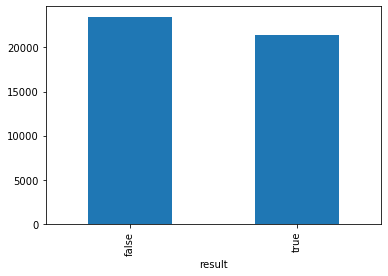

In [9]:
both.groupby(['result'])['text'].count().plot(kind="bar")
plt.show()  # plot to show the amount of real and fake articles

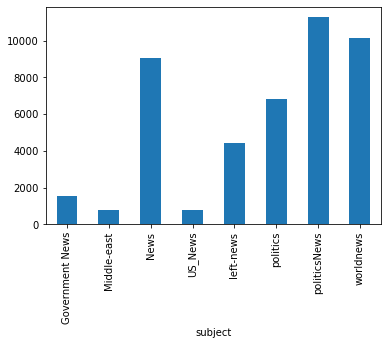

In [10]:
both.groupby(['subject'])['result'].count().plot(kind="bar")
plt.show()  # plot to show the amount of subjects

In [11]:
both['title'] = [entry.lower() for entry in both['title']] # change title column to lowercase
both['text'] = [entry.lower() for entry in both['text']] # change text to lowercase

In [12]:
both_punctuation = dict.fromkeys(i for i in range(sys.maxunicode)
                  if unicodedata.category(chr(i)).startswith('P'))

In [13]:
# remove punctuation from text/title column
bothtextpunctuation = [string.translate(both_punctuation) for string in both['text']]
bothtitlepunctuation = [string.translate(both_punctuation) for string in both['title']]

In [14]:
stop_words = stopwords.words('english')

In [15]:
[word for word in bothtextpunctuation if word not in stop_words] # remove stopwords from text column

['donald trump just couldn t wish all americans a happy new year and leave it at that instead he had to give a shout out to his enemies haters and  the very dishonest fake news media  the former reality show star had just one job to do and he couldn t do it as our country rapidly grows stronger and smarter i want to wish all of my friends supporters enemies haters and even the very dishonest fake news media a happy and healthy new year  president angry pants tweeted  2018 will be a great year for america as our country rapidly grows stronger and smarter i want to wish all of my friends supporters enemies haters and even the very dishonest fake news media a happy and healthy new year 2018 will be a great year for america  donald j trump realdonaldtrump december 31 2017trump s tweet went down about as welll as you d expectwhat kind of president sends a new year s greeting like this despicable petty infantile gibberish only trump his lack of decency won t even allow him to rise above the 

In [16]:
[word for word in bothtitlepunctuation if word not in stop_words] # remove stopwords from title column

[' donald trump sends out embarrassing new years eve message this is disturbing',
 ' drunk bragging trump staffer started russian collusion investigation',
 ' sheriff david clarke becomes an internet joke for threatening to poke people in the eye',
 ' trump is so obsessed he even has obamas name coded into his website images',
 ' pope francis just called out donald trump during his christmas speech',
 ' racist alabama cops brutalize black boy while he is in handcuffs graphic images',
 ' fresh off the golf course trump lashes out at fbi deputy director and james comey',
 ' trump said some insanely racist stuff inside the oval office and witnesses back it up',
 ' former cia director slams trump over un bullying openly suggests hes acting like a dictator tweet',
 ' watch brandnew protrump ad features so much a kissing it will make you sick',
 ' papa johns founder retires figures out racism is bad for business',
 ' watch paul ryan just told us he doesnt care about struggling families livin

In [17]:
tfidf = TfidfVectorizer()

In [18]:
feature_matrix_title = tfidf.fit_transform(both.title)
title_vocab = tfidf.vocabulary_
title_vocab # show feature names, how often the word appears in the title column

{'donald': 5932,
 'trump': 19217,
 'sends': 16582,
 'out': 13168,
 'embarrassing': 6432,
 'new': 12603,
 'year': 20766,
 'eve': 6797,
 'message': 11846,
 'this': 18721,
 'is': 10061,
 'disturbing': 5825,
 'drunk': 6124,
 'bragging': 2622,
 'staffer': 17650,
 'started': 17709,
 'russian': 16074,
 'collusion': 3911,
 'investigation': 9994,
 'sheriff': 16787,
 'david': 4934,
 'clarke': 3691,
 'becomes': 2022,
 'an': 1075,
 'internet': 9925,
 'joke': 10274,
 'for': 7663,
 'threatening': 18745,
 'to': 18865,
 'poke': 14014,
 'people': 13648,
 'in': 9597,
 'the': 18675,
 'eye': 7048,
 'so': 17294,
 'obsessed': 12886,
 'he': 8877,
 'even': 6799,
 'has': 8820,
 'obama': 12842,
 'name': 12434,
 'coded': 3854,
 'into': 9957,
 'his': 9079,
 'website': 20340,
 'images': 9485,
 'pope': 14080,
 'francis': 7783,
 'just': 10355,
 'called': 3035,
 'during': 6192,
 'christmas': 3596,
 'speech': 17478,
 'racist': 14800,
 'alabama': 888,
 'cops': 4398,
 'brutalize': 2811,
 'black': 2279,
 'boy': 2587,
 'w

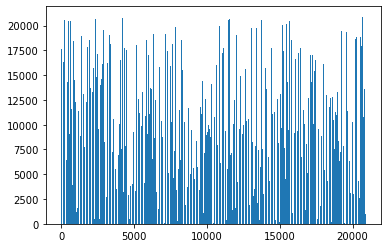

In [19]:
plt.bar(range(len(title_vocab)), list(title_vocab.values()), align='center')
plt.show()

In [20]:
feature_matrix_text = tfidf.fit_transform(both.text)
text_vocab = tfidf.vocabulary_
text_vocab # show feature names, how often the word appears in the title column

{'donald': 35305,
 'trump': 110796,
 'just': 59451,
 'couldn': 29055,
 'wish': 118573,
 'all': 11007,
 'americans': 11659,
 'happy': 49745,
 'new': 76224,
 'year': 120293,
 'and': 12004,
 'leave': 64352,
 'it': 56939,
 'at': 14175,
 'that': 107766,
 'instead': 55773,
 'he': 50409,
 'had': 49109,
 'to': 109171,
 'give': 46570,
 'shout': 99269,
 'out': 80587,
 'his': 51717,
 'enemies': 38519,
 'haters': 50166,
 'the': 107802,
 'very': 115144,
 'dishonest': 34372,
 'fake': 40964,
 'news': 76267,
 'media': 70304,
 'former': 43555,
 'reality': 90050,
 'show': 99289,
 'star': 103063,
 'one': 79683,
 'job': 58622,
 'do': 35020,
 'as': 13695,
 'our': 80565,
 'country': 29160,
 'rapidly': 89551,
 'grows': 48260,
 'stronger': 104185,
 'smarter': 100860,
 'want': 116665,
 'of': 79135,
 'my': 74693,
 'friends': 44276,
 'supporters': 105121,
 'even': 39796,
 'healthy': 50499,
 'president': 86360,
 'angry': 12209,
 'pants': 81770,
 'tweeted': 111581,
 '2018': 4152,
 'will': 118225,
 'be': 16749,
 'g

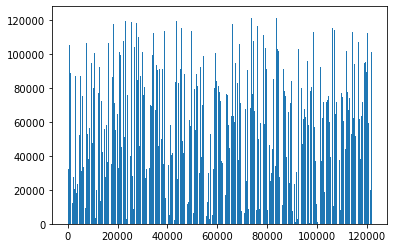

In [21]:
plt.bar(range(len(text_vocab)), list(text_vocab.values()), align='center')
plt.show()

In [22]:
# create function for confusion matrix. 
# Full source is found at http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    feature_matrix_text, both['result'], test_size=0.3, random_state=1) # split text column

In [24]:
#Multinomial Naive Bayes, text
mnb_txt = MultinomialNB().fit(X_train, y_train)
predict_text = mnb_txt.predict(X_test)
score = metrics.accuracy_score(y_test, predict_text)
print("Accuracy:", score)

Accuracy: 0.9402375649591685


Confusion matrix, without normalization


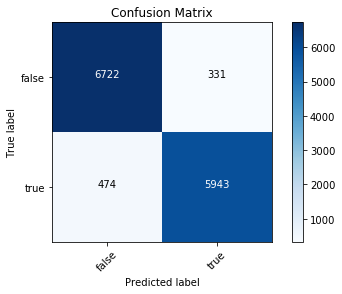

In [25]:
# Confusion matrix for text column
cm = metrics.confusion_matrix(y_test, predict_text, labels=['false', 'true'])
plot_confusion_matrix(cm, classes=['false', 'true'])

In [26]:
# Logistic Regression for text
classifiertxt = LogisticRegression()
classifiertxt.fit(X_train, y_train)
score = classifiertxt.score(X_test, y_test)

print("Accuracy:", score)

C:\Users\xoMos\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.9874536005939124


In [27]:
# split title column
X_train, X_test, y_train, y_test = train_test_split(
    feature_matrix_title, both['result'], test_size=0.3, random_state=1)

In [28]:
# Multinomial Naive Bayes, title
mnb_title = MultinomialNB().fit(X_train, y_train)
predict_title= mnb_title.predict(X_test)
score = metrics.accuracy_score(y_test, predict_title)
print("Accuracy:", score)

Accuracy: 0.9432071269487751


Confusion matrix, without normalization


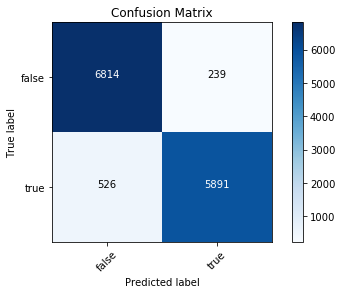

In [29]:
# Confusion matrix for title column
cm = metrics.confusion_matrix(y_test, predict_title)
plot_confusion_matrix(cm, classes=['false', 'true'])

In [30]:
# Logistic Regression for title column
classifiertitle = LogisticRegression()
classifiertitle.fit(X_train, y_train)
score = classifiertitle.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.955456570155902


C:\Users\xoMos\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
